In [2]:
#Imports
from matplotlib import pyplot as plt
import time
import numpy
from zmqRemoteApi import RemoteAPIClient

from scipy import stats

In [3]:
client = RemoteAPIClient()
sim = client.getObject('sim')
client.setStepping(True)
bill = sim.getObject('./Bill/Bill')
robot = sim.getObject('./Omnirob')

In [4]:
#log timestamps and distance for a simulation
def simulate():
    sim.boolparam_display_enabled = False
    sim.intparam_speedmodifier = 100
    timestamps = []
    resultData = []

    sim.startSimulation()

    startRobotPos = sim.getObjectPosition(robot,sim.handle_world)
    startRobotPos[0] += (-4 + numpy.random.random()*8)

    sim.setObjectPosition(robot, sim.handle_world,startRobotPos)

    while (t := sim.getSimulationTime()) < 10:
        s = f'Simulation time: {t:.2f} [s]'
        pos1 = sim.getObjectPosition(bill,sim.handle_world)
        pos2 = sim.getObjectPosition(robot,sim.handle_world)
        dist = numpy.linalg.norm(numpy.subtract(pos1,pos2))
        resultData.append(dist)
        timestamps.append(t)
        client.step()
    sim.stopSimulation()
    return resultData

In [5]:
# Run a monte carlo simulation

def mc_sim(passes):
    minimums = []
    for i in range(0,passes):
        results = simulate()
        minimums.append(min(results))
        time.sleep(0.2)
    return minimums

Text(0.5, 1.0, 'Line')

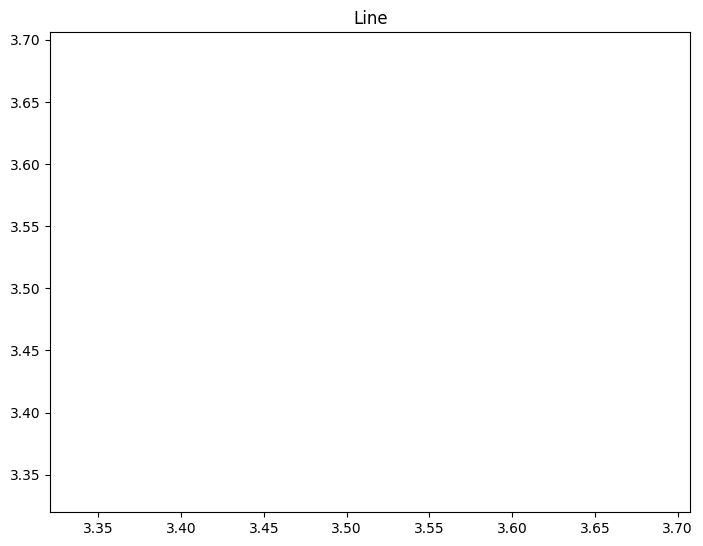

In [6]:
#Run a simple simulation and plot the distance
pass
results = simulate()
fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(results[0], results[1])
ax.set_title("Line")

[3.3582438635697947, 3.162726821780977, 4.819000896983475, 3.584312223837182, 3.374161510823731, 3.167875675591227, 3.505354403010236, 3.055789339024055, 3.149804634422418, 3.2418460408074536, 4.636279780549174, 3.2513741599720167, 3.134349041385049, 3.5502846526531937, 4.112708588896856, 3.323741574894248, 3.0722064782668728, 3.2154932363969064, 3.36273385869328, 3.2082639637290944, 4.161659749716005, 4.953005389923738, 3.063809045815855, 3.6379570508543315, 3.318845073844309, 3.779860006449003, 5.061929635698486, 4.557307639302846, 3.839503715513592, 3.4692460726143883, 3.476523213119578, 3.489585243518537, 3.808426789433531, 3.0628867561375337, 3.481440671111954, 3.054760822167519, 4.679265334512093, 3.103152946602786, 3.353391202408045, 4.989087814932653, 5.288336407471101, 5.198587762693018, 3.2750446669201936, 4.795257195122176, 3.509419676080382, 3.5309926035364185, 3.577406987647998, 3.055283219778937, 3.1455574918871814, 4.975850255644218]


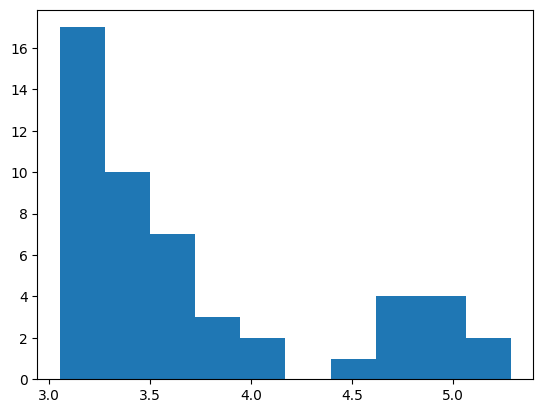

In [8]:
mins = mc_sim(10)
hist = plt.hist(mins)